In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import math

from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi

In [3]:
all_features = pd.read_csv("C:/Users/Allose/Notebook/all_features.csv", index_col=0)
all_features_cell_type = pd.read_csv("C:/Users/Allose/Notebook/all_features_cell_type.csv", index_col=0)

transcriptome_df = pd.read_csv("C:/Users/Allose/Notebook/transcriptome_df.csv", index_col=0)
new_transcriptome_df = pd.read_csv('C:/Users/Allose/Notebook/sep_layer_df.csv', index_col=0)
cre_parameter_df = pd.read_csv("C:/Users/Allose/Notebook/cre_parameter_df.csv", index_col=0)
sep_layer_cre_parameter_df = pd.read_csv('sep_layer_cre_parameter_df.csv', index_col=0)
new_label_df = pd.read_csv("C:/Users/Allose/Notebook/new_label_transcriptome_df.csv", index_col=0)
entrenz_symbol_s = pd.Series.from_csv("C:/Users/Allose/Notebook/entrenz_symbol_s.csv", index_col=0)
f = open("new_spearman_corr_ranks.json","r")
data = json.load(f)
spearman_corr_ranks = data
f.close()

f = open("sep_spearman_corr_ranks.json","r")
data = json.load(f)
sep_spearman_corr_ranks = data
f.close()

f = open("abs_spearman_corr_ranks.json","r")
data = json.load(f)
abs_spearman_corr_ranks = data
f.close()



sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

parameters = ['gbar_Im', 'gbar_Ih', 'gbar_NaTs', 'gbar_Nap', 'gbar_K_P', 'gbar_K_T', 'gbar_SK', 'gbar_Kv3_1', 'gbar_Ca_HVA', 'gbar_Ca_LVA', 'gamma_CaDynamics', 'decay_CaDynamics', 'soma_g_pas', 'axon_g_pas', 'dend_g_pas', 'apic_g_pas', 'gbar_NaV', 'gbar_Kd', 'gbar_Kv2like', 'gbar_Im_v2']

C:\Users\Allose\Anaconda3\lib\site-packages\pandas\core\series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [38]:
ion_channel_genes = pd.read_csv("C:/Users/Allose/Notebook/targets_and_families.csv", index_col=0)
ion_channel_genes = ion_channel_genes[ion_channel_genes['Mouse Entrez Gene'].notnull()]
gene_channel = ion_channel_genes.loc["vgic"]
gene_channel = gene_channel['Mouse Entrez Gene'].values
gene_channel = ['16531', '84036', '140492', '140493', '16534', '227632', '240776',
       '16532', '225865', '212670', '76856', '329954', '252972', '233979',
       '12788', '12789', '12790', '233649', '333329', '30952', '15165',
       '15166', '15168', '330953', '56379', '16518', '16515', '16520',
       '211480', '16519', '16522', '16524', '16521', '16513', '16516',
       '16517', '16523', '16514', '100040591', '20190', '20191', '20192',
       '277328', '22063', '22064', '22065', '22066', '22067', '22068',
       '26946', '17364', '28240', '226025', '68667', '56843', '225997',
       '58800', '171382', '94178', '68279', '171166', '18764', '329064',
       '53871', '193034', '22368', '246788', '63873', '194352', '64177',
       '16525', '16526', '16527', '16528', '16529', '52150', '16530',
       '223604', '72258', '210741', '217826', '241769', '74571', '332396',
       '12292', '12288', '12289', '54652', '12286', '12287', '12290',
       '12291', '58226', '239556', '16485', '16490', '16491', '16492',
       '16493', '16494', '16495', '242151', '16500', '98741', '16502',
       '268345', '16504', '99738', '16506', '16508', '56543', '382571',
       '241794', '240444', '225030', '66733', '16535', '16536', '110862',
       '60613', '226922', '67498', '240595', '16538', '16539', '238076',
       '16510', '238271', '16511', '192775', '170738', '211468', '16512',
       '142984', '74096', '20265', '110876', '20269', '110880', '20271',
       '20273', '20274', '20264', '24046']
new_gene = []
for gene in gene_channel:
    new_gene.append(int(gene))

In [55]:
filtered_trans
142984

,Gad2-IRES-Cre__L5__inh,Sst-IRES-Cre__L6__inh,Nos1-CreERT2|Sst-IRES-FlpO__L5-L6__inh,Oxtr-T2A-Cre__L5-L6__inh,Rbp4-Cre_KL100__L4__exc,Sim1-Cre_KJ18__L4-L6__exc,Chrna2-Cre_OE25__L5__inh,Tlx3-Cre_PL56__L4-L6__exc,Chrna2-Cre_OE25|Pvalb-T2A-Dre__L5-L6__inh,Chat-IRES-Cre-neo__L2/3__inh,...,Vipr2-IRES2-Cre__L1-L6__exc,Nos1-CreERT2__L5-L6__inh,Htr3a-Cre_NO152__L6__inh,Scnn1a-Tg3-Cre__L2/3-L4__exc,Sst-IRES-Cre__L5__inh,Oxtr-T2A-Cre__L5-L6__exc,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre__L1-L4__inh,Esr2-IRES2-Cre__L5-L6__exc,Pvalb-IRES-Cre__L2/3__inh,Htr3a-Cre_NO152__L5__inh
16531,6.568765,7.293232,7.052278,5.121184,9.249151,8.399321,7.356265,8.627757,8.084339,4.938838,...,8.258645,7.504501,4.589128,9.072609,7.033770,7.560775,5.412237,7.944037,7.664079,4.146929
84036,0.924063,0.725010,1.799634,0.240759,1.903054,1.290581,0.508707,1.691087,0.849384,0.605619,...,1.342534,0.794928,0.540113,0.980131,0.611768,0.721585,0.656054,1.210168,1.068842,0.516046
140492,3.570070,2.062281,1.697533,1.500947,2.559189,4.527076,1.784831,3.023977,2.840004,4.536435,...,3.306476,2.734615,4.532529,2.520368,1.740695,4.432548,4.352552,3.071294,3.809222,4.128392
140493,0.347275,0.904243,2.386113,0.453069,1.642515,1.153652,0.071710,1.225311,0.141050,0.000000,...,0.411133,2.250945,0.335402,0.633206,0.319269,0.783661,0.384656,0.348221,0.167399,0.363563
16534,0.007905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.136584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
227632,3.731760,3.817540,5.438847,2.423478,2.358104,3.377363,2.994015,2.211417,4.062159,1.312974,...,2.739425,5.061692,2.654724,3.248992,3.964188,3.566630,3.418550,4.633650,5.103701,2.065904
240776,1.883655,1.415933,5.377808,0.711800,6.161060,6.603418,0.464382,6.285679,0.133080,6.343366,...,6.065773,3.801550,3.942262,6.140232,0.945422,4.307547,3.869666,5.686391,1.180508,2.443031
16532,1.344965,1.694280,2.206374,0.988570,0.722401,0.908339,1.550376,0.489324,1.188577,0.785637,...,1.541864,1.562806,1.800642,0.608572,1.671686,1.386939,2.777005,1.857024,1.082301,1.261627
225865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
212670,0.856737,0.926660,1.022350,0.358737,0.504801,0.944342,0.725482,0.662770,0.451942,0.690415,...,1.083791,0.618100,0.422359,0.661721,0.489675,1.140856,0.000000,0.876107,0.840375,0.535777


In [60]:
filtered_trans = transcriptome_df.loc[new_gene]

for index, column in filtered_trans.iteritems():
    na_array = pd.isna(column)
    index = 0
    for values in na_array:
        index += 1
        if values == True:
            index -= 1
            filtered_trans.drop(na_array.index.values[index], inplace=True)
            


C:\Users\Allose\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [65]:
filtered_trans.loc'

Gad2-IRES-Cre__L5__inh                          6.568765
Sst-IRES-Cre__L6__inh                           7.293232
Nos1-CreERT2|Sst-IRES-FlpO__L5-L6__inh          7.052278
Oxtr-T2A-Cre__L5-L6__inh                        5.121184
Rbp4-Cre_KL100__L4__exc                         9.249151
Sim1-Cre_KJ18__L4-L6__exc                       8.399321
Chrna2-Cre_OE25__L5__inh                        7.356265
Tlx3-Cre_PL56__L4-L6__exc                       8.627757
Chrna2-Cre_OE25|Pvalb-T2A-Dre__L5-L6__inh       8.084339
Chat-IRES-Cre-neo__L2/3__inh                    4.938838
Htr3a-Cre_NO152__L4__inh                        4.126760
Sst-IRES-Cre__L4__inh                           6.725717
Pvalb-IRES-Cre__L4__inh                         8.024173
Htr3a-Cre_NO152|Pvalb-T2A-Dre__L5-L6__inh       7.514566
Vip-IRES-Cre__L6__inh                           4.534846
Vip-IRES-Cre__L5__inh                           4.638675
Penk-IRES2-Cre-neo__L5-L6__exc                  8.508685
Ndnf-IRES2-dgCre__L1__inh      

In [70]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Separate out the features
x = filtered_trans.values

# Standardize the features
x = StandardScaler().fit_transform(x)

# Perform a 2 component PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

# Overall PCA data
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))


Variance explained per principal component: [0.83317403 0.06192612]


In [69]:
filtered_trans.values


array([[6.56876499, 7.2932316 , 7.05227805, ..., 7.94403668, 7.66407942,
        4.14692949],
       [0.92406332, 0.7250099 , 1.7996336 , ..., 1.21016831, 1.0688416 ,
        0.51604632],
       [3.57007006, 2.06228132, 1.69753273, ..., 3.07129415, 3.80922157,
        4.12839174],
       ...,
       [0.84208337, 1.49166507, 4.98392367, ..., 1.07381367, 1.55257904,
        1.66058547],
       [0.01791431, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.008     , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [10]:
x = transcriptome_df.loc[:, :].values
x

array([[6.70342913e-02, 1.45635958e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.40280050e-01, 3.33333333e-02],
       [7.10069754e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.72390770e+00, 6.87707185e+00, 7.24261201e+00, ...,
        6.76898414e+00, 6.79461409e+00, 6.67724226e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

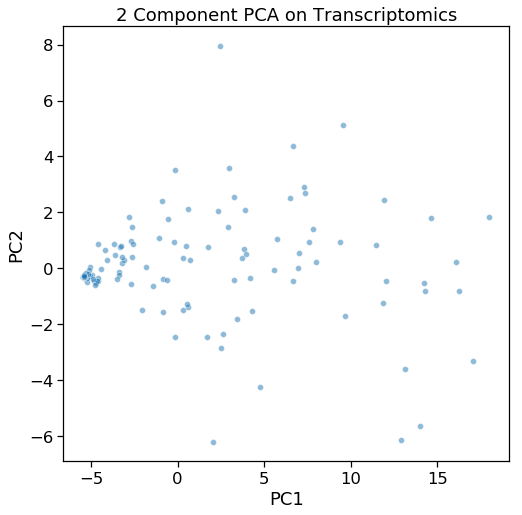

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

#Plot PCA graphs with two different visualization
plt.figure(figsize=(8, 8))
plt.title('2 Component PCA on Transcriptomics')
ax = sns.scatterplot(x="PC1", y="PC2", alpha=0.5, data=principalDf)

